In [2]:
import pandas as pd
from statistics import mean, stdev

In [52]:
df = pd.read_excel("Implementation_results-random_uniform-27102025215801.xlsx")
df = df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1)
df_full =  df.copy()
df = df[df["Awarded"] == True][["Iteration", "ECN", "Supplier name", "SOP ready"]].drop_duplicates().reset_index().drop(["index"], axis=1)
df

,Iteration,ECN,Supplier name,SOP ready
0,1,ECN0000301,"Tuberías ABC, S.A. de C.V.",True
1,1,ECN0000302,"Tuberías Súper, S.A.P.I.",True
2,1,ECN0000303,"Tuberías ABC, S.A. de C.V.",False
3,1,ECN0000304,"Tuberías DEF, S. de R.L.",True
4,1,ECN0000305,"Tuberías GHI, S.A.S.",True
...,...,...,...,...
995,100,ECN0000306,"Tuberías Súper, S.A.P.I.",False
996,100,ECN0000307,"Tuberías GHI, S.A.S.",True
997,100,ECN0000308,"Tuberías GHI, S.A.S.",True
998,100,ECN0000309,"Tuberías ABC, S.A. de C.V.",True


In [53]:
df_full

,Iteration,Project,ECN,ECN release,Part number,Complexity,EAU,Delivery profile,Quotation profile,Price profile,...,PPAP approval,Contract date,Quotation time,OTD,Delivery time,FY Spend,Awarded,MCS ready,Pilot ready,SOP ready
0,1,Juneau,ECN0000301,2024-07-10,A0A000001,medium,224,regular,low,regular,...,2024-10-14,2024-10-14,19.0,False,40.0,743.68,True,False,False,True
1,1,Juneau,ECN0000301,2024-07-10,A0D000001,medium,224,regular,low,regular,...,2024-10-14,2024-10-14,19.0,False,40.0,18401.60,True,False,False,True
2,1,Juneau,ECN0000302,2024-07-17,A0A000002,medium,23,low,low,low,...,2024-09-24,2024-09-27,7.2,True,19.0,717.37,True,False,False,True
3,1,Juneau,ECN0000302,2024-07-17,A0A000003,low,23,low,low,low,...,2024-09-24,2024-09-27,7.2,True,19.0,651.82,True,False,False,True
4,1,Juneau,ECN0000302,2024-07-17,A0A000004,low,23,low,low,low,...,2024-09-24,2024-09-27,7.2,True,19.0,328.44,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,100,Juneau,ECN0000309,2024-04-04,A0B000002,medium,554,regular,low,regular,...,2024-09-01,2024-09-04,41.0,False,63.0,29500.50,True,False,False,True
3796,100,Juneau,ECN0000309,2024-04-04,A0G000338,high,554,regular,low,regular,...,2024-09-01,2024-09-04,41.0,False,63.0,69222.30,True,False,False,True
3797,100,Juneau,ECN0000310,2024-08-21,A0A000017,low,23,regular,low,regular,...,2024-11-07,2024-11-07,7.2,False,49.0,388.24,True,False,False,False
3798,100,Juneau,ECN0000310,2024-08-21,A0A000018,low,23,regular,low,regular,...,2024-11-07,2024-11-07,7.2,False,49.0,363.63,True,False,False,False


In [29]:
df["Iteration"].max()

np.int64(100)

In [ ]:
supplier_list = {"Tuberías ABC, S.A. de C.V.": [], "Tuberías DEF, S. de R.L.": [], "Tuberías GHI, S.A.S.": [], "Tuberías Súper, S.A.P.I.": []}

for i in range(1,101):
    for supplier in supplier_list.keys():
        ecn_qty = len(df[(df["Iteration"] == i) & (df["Supplier name"] == supplier)])
        supplier_list[supplier].append(ecn_qty)

joint_list = []

for key in supplier_list.keys():
    joint_list += supplier_list[key]

print(f"ECN\nAverage: {mean(joint_list)}\nStDev: {round(stdev(joint_list),2)}")

supplier_table = {
    "Supplier": [],
    "ECN avg": [],
    "ECN std": []
}

for supplier in supplier_list.keys():
    supplier_table["Supplier"].append(supplier)
    supplier_table["ECN avg"].append(mean(supplier_list[supplier]))
    supplier_table["ECN std"].append(stdev(supplier_list[supplier]))

pd.DataFrame(data=supplier_table)

,Supplier,ECN avg,ECN std
0,"Tuberías ABC, S.A. de C.V.",2.35,1.225775
1,"Tuberías DEF, S. de R.L.",2.71,1.479114
2,"Tuberías GHI, S.A.S.",2.19,1.244747
3,"Tuberías Súper, S.A.P.I.",2.75,1.305582


In [ ]:
supplier_list = {"Tuberías ABC, S.A. de C.V.": [], "Tuberías DEF, S. de R.L.": [], "Tuberías GHI, S.A.S.": [], "Tuberías Súper, S.A.P.I.": []}

for i in range(1,101):
    for supplier in supplier_list.keys():
        try:
            otd = len(df[(df["Iteration"] == i) & (df["Supplier name"] == supplier) & (df["SOP ready"] == True)]) / len(df[(df["Iteration"] == i) & (df["Supplier name"] == supplier)])
        except ZeroDivisionError:
            otd = 0
        supplier_list[supplier].append(otd)

joint_list = []

for key in supplier_list.keys():
    joint_list += supplier_list[key]

print(f"OTD\nAverage: {round(mean(joint_list),4)}\nStDev: {round(stdev(joint_list),6)}")

supplier_table = {
    "Supplier": [],
    "OTD avg": [],
    "OTD std": []
}

for supplier in supplier_list.keys():
    supplier_table["Supplier"].append(supplier)
    supplier_table["OTD avg"].append(mean(supplier_list[supplier]))
    supplier_table["OTD std"].append(stdev(supplier_list[supplier]))

pd.DataFrame(data=supplier_table)

,Supplier,OTD avg,OTD std
0,"Tuberías ABC, S.A. de C.V.",0.478500,0.333395
1,"Tuberías DEF, S. de R.L.",0.486333,0.342348
2,"Tuberías GHI, S.A.S.",0.425833,0.355203
3,"Tuberías Súper, S.A.P.I.",0.572381,0.345584


In [54]:
supplier_list = {"Tuberías ABC, S.A. de C.V.": [], "Tuberías DEF, S. de R.L.": [], "Tuberías GHI, S.A.S.": [], "Tuberías Súper, S.A.P.I.": [], "Total": []}

for i in range(1,101):
    total = 0
    for supplier in supplier_list.keys():
        if supplier != "Total":
            spend = df_full[(df_full["Iteration"] == i) & (df_full["Supplier name"] == supplier) & (df_full["Awarded"] == True)]["FY Spend"].sum()
            supplier_list[supplier].append(spend)
            total += spend
    supplier_list["Total"].append(total)

supplier_table = {
    "Supplier": [],
    "Spend avg": [],
    "Spend std": []
}

for supplier in supplier_list.keys():
    supplier_table["Supplier"].append(supplier)
    supplier_table["Spend avg"].append(mean(supplier_list[supplier]))
    supplier_table["Spend std"].append(stdev(supplier_list[supplier]))

pd.DataFrame(data=supplier_table)

,Supplier,Spend avg,Spend std
0,"Tuberías ABC, S.A. de C.V.",85722.6322,75083.687268
1,"Tuberías DEF, S. de R.L.",105925.3218,85251.329911
2,"Tuberías GHI, S.A.S.",75346.4281,66952.782388
3,"Tuberías Súper, S.A.P.I.",105071.6691,68431.965922
4,Total,372066.0512,36008.371728


## Section 2
### Analysis of 1000-ECN simulation

In [1]:
!ls Results

Fuzzy_evaluation_results-31102025210231.xlsx
Implementation_results-31102025210231.xlsx
Scenario1


In [10]:
df = pd.read_excel("Results/Implementation_results-31102025210231.xlsx")
df = df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1)
df_full =  df.copy()
df = df[df["Awarded"] == True][["Iteration", "ECN", "ECN release", "Supplier name", "SOP ready"]].drop_duplicates().reset_index().drop(["index"], axis=1)
df

,Iteration,ECN,ECN release,Supplier name,SOP ready
0,1,ECN0000514,2023-11-01,"Tuberías ABC, S.A. de C.V.",1.0
1,1,ECN0000904,2023-11-01,"Tuberías DEF, S. de R.L.",1.0
2,1,ECN0000933,2023-11-01,"Tuberías GHI, S.A.S.",1.0
3,1,ECN0001114,2023-11-01,"Tuberías ABC, S.A. de C.V.",1.0
4,1,ECN0001054,2023-11-08,"Tuberías Súper, S.A.P.I.",1.0
...,...,...,...,...,...
995,1,ECN0001102,2025-02-04,"Tuberías Súper, S.A.P.I.",0.0
996,1,ECN0000317,2025-02-06,"Tuberías Súper, S.A.P.I.",0.0
997,1,ECN0000995,2025-02-07,"Tuberías Súper, S.A.P.I.",0.0
998,1,ECN0000920,2025-02-26,"Tuberías Súper, S.A.P.I.",0.0


In [8]:
supplier_list = ["Tuberías ABC, S.A. de C.V.", "Tuberías DEF, S. de R.L.", "Tuberías GHI, S.A.S.", "Tuberías Súper, S.A.P.I."]
supplier_table = {
    "Supplier": [],
    "ECN": []
}

for supplier in supplier_list:
    ecn_qty = len(df[(df["Supplier name"] == supplier)])
    supplier_table["Supplier"].append(supplier)
    supplier_table["ECN"].append(ecn_qty)

print(f"ECN\nAverage: {mean(supplier_table['ECN'])}\nStDev: {round(stdev(supplier_table['ECN']),2)}")

pd.DataFrame(data=supplier_table)

ECN
Average: 250
StDev: 473.39


,Supplier,ECN
0,"Tuberías ABC, S.A. de C.V.",14
1,"Tuberías DEF, S. de R.L.",4
2,"Tuberías GHI, S.A.S.",22
3,"Tuberías Súper, S.A.P.I.",960


In [16]:
super_supplier_df = df[df["Supplier name"] == "Tuberías Súper, S.A.P.I."]
fechas = super_supplier_df["ECN release"].unique()

table = {
    "Fecha": [],
    "ECN": []
}

ecn_counter = 0

for fecha in fechas:
    ecn_qty = len(super_supplier_df[super_supplier_df["ECN release"] == fecha])
    ecn_counter += ecn_qty
    table["Fecha"].append(fecha)
    table["ECN"].append(ecn_counter)

ecn_df = pd.DataFrame(data=table)

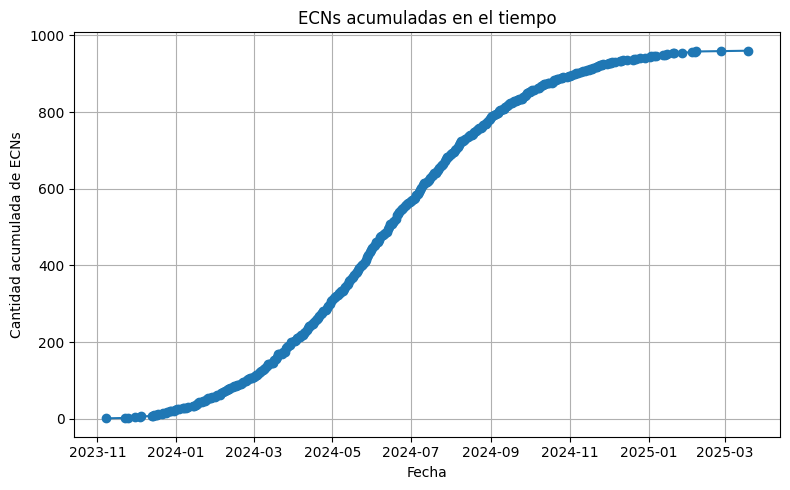

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(ecn_df['Fecha'], ecn_df['ECN'], marker='o')
plt.title('ECNs acumuladas en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad acumulada de ECNs')
plt.grid(True)
plt.tight_layout()
plt.show()